#### 1) К алгоритму kNN, представленному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_blobs
import random

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
X, y = load_iris(return_X_y=True)
X = X[:, :2]

#### Разделим выборку на обучающую и тестовую.

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

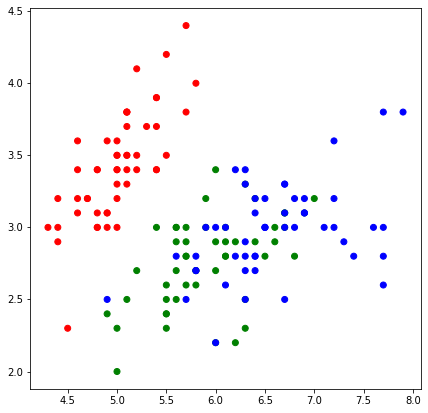

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

#### Используем евклидову метрику. Реализуем функцию для ее подсчета.

In [5]:
def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)

#### Добавим функцию расчета веса признака в зависимости от расстояния. Представим 2 варианта расчета.

In [6]:
def get_weights(distance, a=1, b=2):
    return 1 / (distance + a) ** b

def get_weights2(distance, q=0.9):
    return q ** distance

#### Реализуем алгоритм поиска k ближайших соседей.

In [7]:
def knn(x_train, y_train, x_test, k):
    answers = []
    for x in x_test:
#         test_distances = []
        test_weights = []
        
        for i in range(len(x_train)):
            distance = e_metrics(x, x_train[i])
            weight = get_weights(distance)
#             weight = get_weights2(distance)
            
#             test_distances.append((distance, y_train[i]))
            test_weights.append((weight, y_train[i]))
        
        classes = {class_item: 0 for class_item in set(y_train)}
#         for d in sorted(test_distances)[0:k]:
#         print(sorted(test_weights, reverse=True)[0:k])
        for d in sorted(test_weights, reverse=True)[0:k]:
            classes[d[1]] += 1
        
        answers.append(sorted(classes, key=classes.get)[-1])
    
    return answers

#### Функция для вычисления точности.

In [8]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

#### Проверим алгоритм при разных k.

In [9]:
k = 1
y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.733


#### Точность для k=1 выше, чем при классификации по расстоянию. Далее точность падает и выравнивается при k=7.

In [10]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

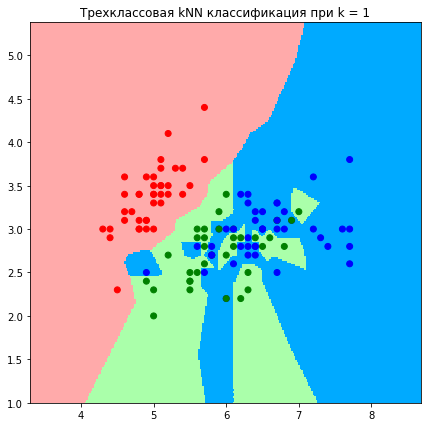

In [11]:
get_graph(X_train, y_train, k)

In [12]:
k = 3
y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.700


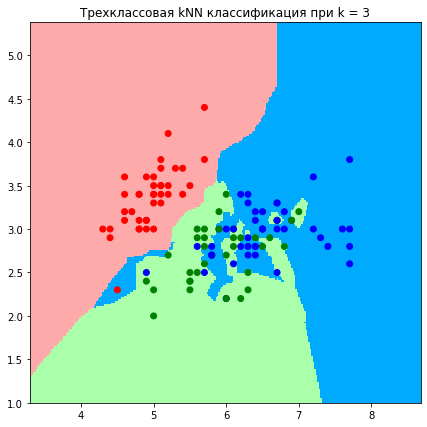

In [13]:
get_graph(X_train, y_train, k)

In [14]:
k = 5
y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.800


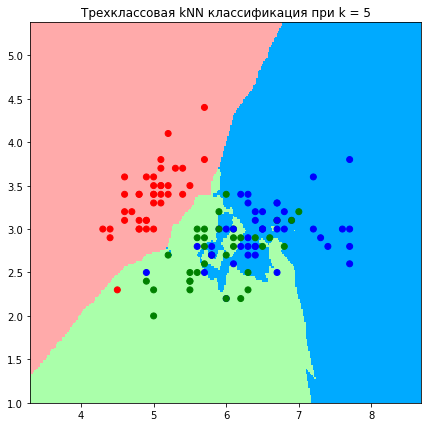

In [15]:
get_graph(X_train, y_train, k)

In [16]:
k = 9
y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 9: 0.867


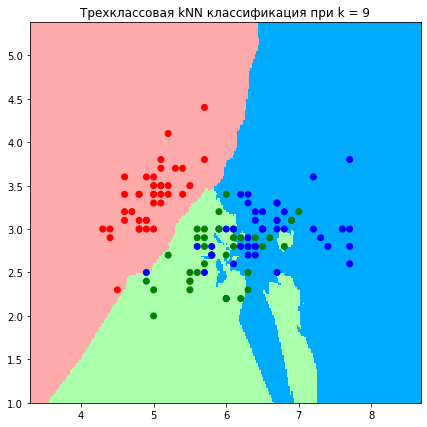

In [17]:
get_graph(X_train, y_train, k)